<a href="https://colab.research.google.com/github/You10Ariga/python-with-datasciece/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
url = "https://github.com/nagamamo/data/blob/main/3_single_factor_data.csv?raw=true"
data = pd.read_csv(url)
df = data.set_index("Date")
company_list = ['Tesla', 'Nasdaq', 'GM', 'DowJones']
df.columns = company_list
df.describe()

,Tesla,Nasdaq,GM,DowJones
count,2768.000000,2768.000000,2768.000000,2768.000000
mean,0.537736,0.144483,0.123480,0.103212
std,8.950417,3.183218,5.363425,2.674306
min,-52.657057,-30.803124,-43.307281,-32.316367
25%,-3.739827,-1.152923,-2.515808,-0.911390
50%,0.316036,0.228293,0.078314,0.137206
75%,4.743197,1.737332,2.663932,1.310524
max,60.988135,23.364743,49.859026,28.412596


In [4]:
lrl = LinearRegression()
X = df[['Nasdaq']].values
Y = df[['Tesla']].values
Xl = np.delete(X, 0, 0)
Yl = np.delete(Y, 0, 0)
lrl.fit(Xl, Yl)
print('Tesla')
print('β = %.4f'% lrl.coef_[0])
print('intercept = %.4f'% lrl.intercept_)
print('R_squared = %.4f'% lrl.score(Xl, Yl))

Tesla
β = 1.4375
intercept = 0.3313
R_squared = 0.2614


/tmp/ipython-input-3018691532.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('β = %.4f'% lrl.coef_[0])
/tmp/ipython-input-3018691532.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('intercept = %.4f'% lrl.intercept_)


In [5]:
lrl = LinearRegression()
a = df[['DowJones']].values
b = df[['GM']].values
al = np.delete(a, 0, 0)
bl = np.delete(b, 0, 0)
lrl.fit(al, bl)
print('GM')
print('β = %.4f'% lrl.coef_[0])
print('intercept = %.4f'% lrl.intercept_)
print('R_squared = %.4f'% lrl.score(al, bl))

GM
β = 1.2683
intercept = -0.0077
R_squared = 0.3999


/tmp/ipython-input-3169704510.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('β = %.4f'% lrl.coef_[0])
/tmp/ipython-input-3169704510.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('intercept = %.4f'% lrl.intercept_)


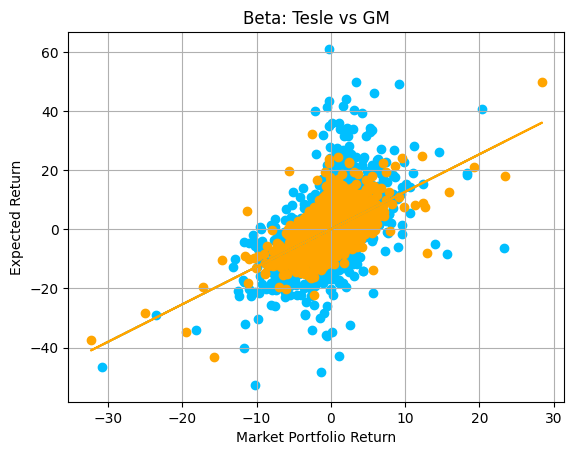

In [8]:
plt.scatter(Xl, Yl, color = 'deepskyblue')
plt.plot(Xl, lrl.predict(Xl), linestyle = 'dashed', color = 'deepskyblue')
plt.scatter(al, bl, color = 'orange')
plt.plot(al, lrl.predict(al), color = 'orange')
plt.title('Beta: Tesle vs GM')
plt.xlabel('Market Portfolio Return')
plt.ylabel('Expected Return')
plt.grid()
plt.show()

In [9]:
def SML(rf, rm, label):
  Beta = [x/10 for x in range(20)]
  ExpectedReturns = [rf + (rm - rf) * x for x in Beta]
  plt.plot(Beta, ExpectedReturns, label = label)
  plt.title('Security Market Line')
  plt.xlabel('Beta')
  plt.ylabel('Expected Return')
  plt.plot(1, rm, 'ro')

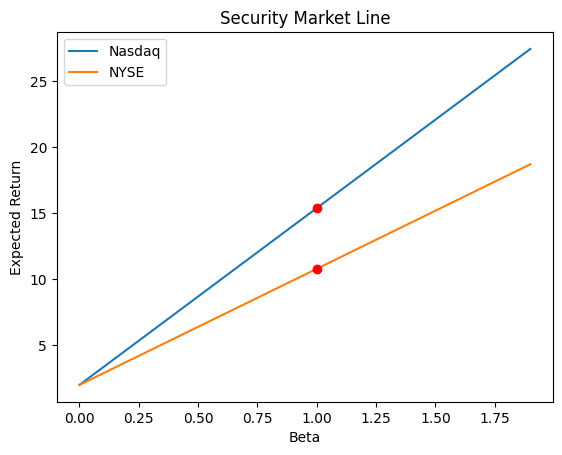

In [12]:
SML(2.0, 15.4, 'Nasdaq')
SML(2.0, 10.8, 'NYSE')
plt.legend()
plt.show()